In [6]:
import json
import seaborn as sns 
import pprint as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
def get_network_name(name):
    if "e+2304+v+512" in name:
        return "hypercube"
    if "e+51+v+27" in name:
        return "sun"    
    if "e+15+v+14" in name:
        return "microservices"
    if "e+1273+v+512" in name:
        return "AS"
    if "spokecommunitycircle" in name:  
        return "spoke community"
    if "communitycircle" in name:  
        return "community"
    if "circle" in name:  
        return "circle"
    if "foresthubandspoke" in name:
        return "forest hub & spoke"
    if "longforesthubandspoke" in name:
        return "long forest hub & spoke"
    if "hubandspoke" in name:
        return "hub & spoke"
    if "scalefree" in name:
        return "scalefree"
    if "smallworld" in name:
        return "smallworld"
    

In [9]:
def gen_graph(roundData, maxIter, cat, network, pf):
    x = list(range(maxIter))
    avgs = []
    medians = []
    stdev = []
    difsmax = []
    difsmin = []
    for k in roundData.keys():   
        lst = roundData[k]
        avg = sum(lst) / len(lst)
        med = statistics.median(lst)
        medians.append(med)
        avgs.append(avg)
        var = sum((x-avg)**2 for x in lst) / len(lst)
        std = var**0.5
        difsmin.append(avg +std)
        difsmax.append(avg-std)
        stdev.append(stdev)
    fig, ax = plt.subplots()
    ax.plot(x, avgs, '-')
    plt.ylim(0, 1)
    ax.fill_between(x, difsmin, difsmax, alpha=0.2)
    ax.set_xlabel('round number')  # Add an x-label to the axes.
    ax.set_ylabel(cat)  # Add a y-label to the axes.
    ax.set_title(network + " pf=" + pf)  # Add a title to the axes.
    #ax.legend()  # Add a legend.
    
    
def load_JSON(cat):
    folder = './jsonDataReport'
    roundData = {}
    import os    
    files = os.listdir(folder)
    for fname in files:
        with open(folder+'/'+fname, "r") as f:
            data = json.load(f)            
        network = get_network_name(fname)
        maxIter = int(data['maxIter'][0])
        pf = str(data['pf'][0])
        nhopsPrune = int(data['nhopsPrune'][0])        
        for i in range(maxIter):            
             df = pd.DataFrame(data[str(i)].values())             
             if i not in roundData:               
                 roundData[i] = []                    
             roundData[i].extend(df[cat].tolist())            
    return maxIter, roundData, network, pf

    
def load_JSON2(cat, prefix):
    folder = './jsonDataReport'
    roundData = {}
    import os    
    files = os.listdir(folder)
    for fname in files:
        if(prefix in fname):
            print("ntra")
            with open(folder+'/'+fname, "r") as f:
                data = json.load(f)            
            network = get_network_name(fname)
            maxIter = int(data['maxIter'][0])
            pf = str(data['pf'][0])
            nhopsPrune = int(data['nhopsPrune'][0])        
            for i in range(maxIter):            
                 df = pd.DataFrame(data[str(i)].values())             
                 if i not in roundData:               
                     roundData[i] = []                    
                 roundData[i].extend(df[cat].tolist())            
    return maxIter, roundData, network, pf

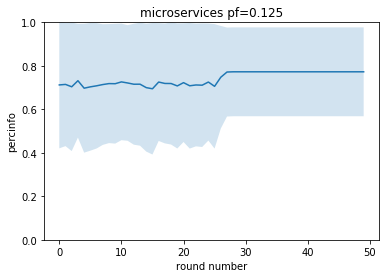

In [10]:
cat = 'percinfo'
maxIter, roundData, network, pf = load_JSON(cat)
gen_graph(roundData, maxIter, cat, network, pf)

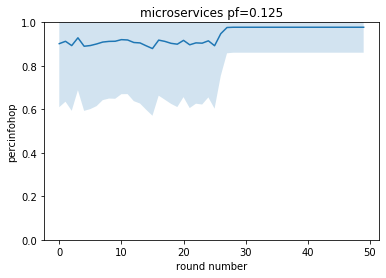

In [11]:
cat = 'percinfohop'
maxIter, roundData, network, pf = load_JSON(cat)
gen_graph(roundData, maxIter, cat, network, pf)

ntra


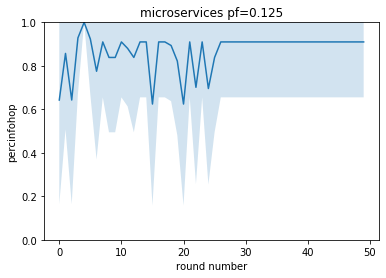

In [13]:
#a way to predict which node is going to fail
# have a counter of nodes that have info about a node
# evaluate betweeness centrality at each step see if we can associate probability of failure in runtime
# statistic analysis
#number of hops vs some network metric to kwon which information is going to be synch fast
cat = 'percinfohop'
maxIter, roundData, network, pf = load_JSON2(cat, "20211005151602")
gen_graph(roundData, maxIter, cat, network, pf)

ntra


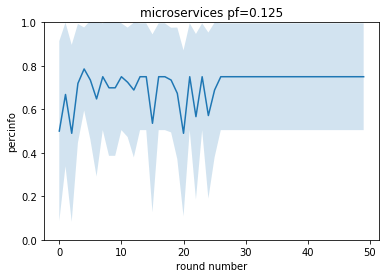

In [14]:
cat = 'percinfo'
maxIter, roundData, network, pf = load_JSON2(cat, "20211005151602")
gen_graph(roundData, maxIter, cat, network, pf)

processing...exp+ps+0+pf+0.125+mode+carriersrep+maxIter+50+e+15+v+14+load+replalgon+NODELAY+nhopsinfo+redFactor+3+20211005151602+jsonDataReport.json
[4, 4, 4, 4, 4, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


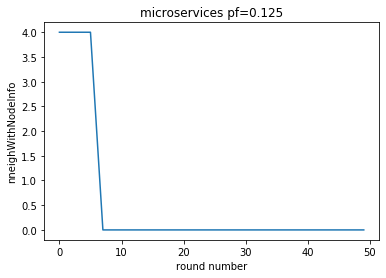

In [34]:
import os

def gen_graph(roundData, maxIter, cat, network, pf):
    x = list(range(maxIter))
    avgs = []
    medians = []
    stdev = []
    difsmax = []
    difsmin = []
    '''
    for k in roundData.keys():   
        lst = roundData[k]
        avg = sum(lst) / len(lst)
        med = statistics.median(lst)
        medians.append(med)
        avgs.append(avg)
        var = sum((x-avg)**2 for x in lst) / len(lst)
        std = var**0.5
        difsmin.append(avg +std)
        difsmax.append(avg-std)
        stdev.append(stdev)
    '''
    fig, ax = plt.subplots()
    ax.plot(x, roundData, '-')
    #plt.ylim(0, 1)
    #ax.fill_between(x, difsmin, difsmax, alpha=0.2)
    ax.set_xlabel('round number')  # Add an x-label to the axes.
    ax.set_ylabel(cat)  # Add a y-label to the axes.
    ax.set_title(network + " pf=" + pf)  # Add a title to the axes.
    #ax.legend()  # Add a legend.

def load_JSON3(cat, prefix, id_node):
    folder = './jsonDataReport'
    roundData = {} 
    lvals = []
    files = os.listdir(folder)
    for fname in files:
        if(prefix in fname):
            print("processing..." + fname)
            with open(folder+'/'+fname, "r") as f:
                data = json.load(f)            
            network = get_network_name(fname)
            maxIter = int(data['maxIter'][0])
            pf = str(data['pf'][0])
            nhopsPrune = int(data['nhopsPrune'][0])        
            for i in range(maxIter):    
                if id_node in data[str(i)]:
                    #print(i, data[str(i)][id_node])
                    lvals.append(data[str(i)][id_node]["nneighWithNodeInfo"])
                else:
                    lvals.append(0)
    print(lvals)
    return maxIter, lvals, network, pf

'''
queue-master
'''
cat = 'nneighWithNodeInfo'
maxIter, roundData, network, pf = load_JSON3(cat, "20211005151602", 'queue-master')
gen_graph(roundData, maxIter, cat, network, pf)

In [49]:
def get_initial_info(cat, prefix):
    folder = './jsonDataReport'
    roundData = {} 
    lvals = {}
    files = os.listdir(folder)
    for fname in files:
        if(prefix in fname):
            print("processing..." + fname)
            with open(folder+'/'+fname, "r") as f:
                data = json.load(f)            
            network = get_network_name(fname)
            maxIter = int(data['maxIter'][0])
            pf = str(data['pf'][0])
            nhopsPrune = int(data['nhopsPrune'][0])                            
            #print(i, data[str(i)][id_node])
            for id_node in data[str(0)].keys():
                lvals[id_node] = data[str(0)][id_node]["nneighWithNodeInfo"];
            
    print(lvals)
    return lvals
    #return maxIter, lvals, network, pf


res = get_initial_info(cat, "20211005151602")
li =[(k, v) for k, v in res.items()]
sorted(li, key=lambda data: data[1])

processing...exp+ps+0+pf+0.125+mode+carriersrep+maxIter+50+e+15+v+14+load+replalgon+NODELAY+nhopsinfo+redFactor+3+20211005151602+jsonDataReport.json
{'catalogue-db': 7, 'front_end': 13, 'carts-db': 10, 'rabbitmq': 9, 'catalogue': 12, 'orders-db': 12, 'queue-master': 4, 'router': 12, 'carts': 13, 'shipping': 13, 'payment': 12, 'orders': 14, 'user-db': 10, 'user': 13}


[('queue-master', 4),
 ('catalogue-db', 7),
 ('rabbitmq', 9),
 ('carts-db', 10),
 ('user-db', 10),
 ('catalogue', 12),
 ('orders-db', 12),
 ('router', 12),
 ('payment', 12),
 ('front_end', 13),
 ('carts', 13),
 ('shipping', 13),
 ('user', 13),
 ('orders', 14)]

In [50]:

folder = './jsonDataReport'
fname = "exp+ps+0+pf+0.125+mode+carriersrep+maxIter+50+e+15+v+14+load+replalgon+NODELAY+nhopsinfo+redFactor+3+20211005151602+jsonDataReport.json"
with open(folder+'/'+fname, "r") as f:
    data = json.load(f)
df = pd.DataFrame(data[str(14)].values())   
df.head()

,percinfo,nneignhops,sizeinfo,version,nneighWithNodeInfo,status,percinfohop
0,0.500000,7,7,1,7,alive,1.000000
1,0.928571,13,13,2,13,alive,1.000000
2,0.714286,10,10,2,10,alive,1.000000
3,0.571429,9,8,4,8,alive,0.888889
4,0.857143,12,12,4,12,alive,1.000000


In [20]:
df['status'].value_counts()

alive     13
failed     1
Name: status, dtype: int64

In [23]:
data.keys()

dict_keys(['44', '45', '46', '47', '48', '49', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '20', '21', 'nhopsPrune', '22', '23', '24', '25', '26', '27', '28', '29', 'maxIter', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', 'pf', '40', '41', '42', '43'])

## Dataframe creation

In [22]:
experiment_events = []
for round_number, round_info in data.items():
    try:
        for node_number, node_info in round_info.items():
            event_info = {
                'roundNumber': int(round_number),
                'nodeNumber': node_number
            }
            event_info.update(node_info)
            experiment_events.append(event_info)
    except:
        continue

In [24]:
df_flattened_exp = pd.DataFrame(experiment_events)
df_flattened_exp.sort_values('roundNumber', inplace=True)
df_flattened_exp.head(1)

,roundNumber,nodeNumber,percinfo,nneignhops,sizeinfo,version,nneighWithNodeInfo,status,percinfohop
224,0,catalogue-db,0.5,7,7,1,7,alive,1.0


## Dataframe null check

In [25]:
df_flattened_exp.isnull().sum()

roundNumber           0
nodeNumber            0
percinfo              0
nneignhops            0
sizeinfo              0
version               0
nneighWithNodeInfo    0
status                0
percinfohop           0
dtype: int64

In [51]:
df_failing_node = df_flattened_exp[
    df_flattened_exp['nodeNumber'] == 'queue-master'
].copy(deep=True).sort_index()

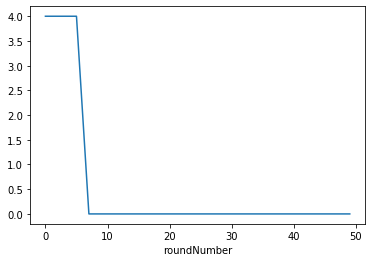

In [52]:
df_failing_node.set_index('roundNumber', inplace=True)
df_failing_node.sort_index(inplace=True)
df_failing_node['nneighWithNodeInfo'].plot()

In [53]:
data['5']['queue-master']

{'percinfo': 0.2857142857142857,
 'nneignhops': 4,
 'sizeinfo': 4,
 'version': 2,
 'nneighWithNodeInfo': 4,
 'status': 'alive',
 'percinfohop': 1}

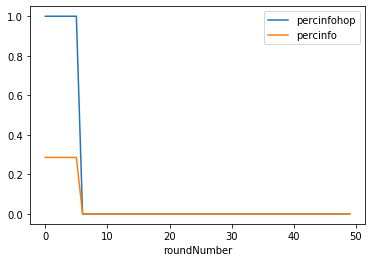

In [54]:
df_failing_node[['percinfohop', 'percinfo']].plot()

## Nodes that have more rounds in failure state

In [29]:
df_flattened_exp[df_flattened_exp['status'] == 'failed']['nodeNumber'].value_counts().to_frame()

,nodeNumber
queue-master,44
orders-db,5
carts,5
user-db,4
carts-db,4
catalogue,4
shipping,3
rabbitmq,3
user,2
router,2


## Nombres de nodos que en la última ronda no estaban vivos

In [55]:
df_flattened_exp[
    (df_flattened_exp['roundNumber'] == df_flattened_exp['roundNumber'].max()) &
    (df_flattened_exp['status'] == 'failed')
]['nodeNumber'].unique()

array(['queue-master'], dtype=object)

## Nodes Version

Each time that a node fails and it is recreated a new node version is added. 

In [56]:
df_flattened_exp.groupby('nodeNumber')['version'].max().sort_values(ascending=False)

nodeNumber
user-db         8
orders-db       7
carts           7
shipping        6
catalogue       6
rabbitmq        5
user            4
router          4
carts-db        4
payment         3
orders          3
front_end       3
queue-master    2
catalogue-db    2
Name: version, dtype: int64